In [ ]:
!gdown --id 1OafUwixUVnq_7tdAfh_D8NetXec-46Wa
!gdown --id 17zmAWDVNs3vzSd7u2ZJaxy4G-ZsBix-I

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OafUwixUVnq_7tdAfh_D8NetXec-46Wa
To: /content/train_alphabet2.csv
100% 239M/239M [00:03<00:00, 70.4MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17zmAWDVNs3vzSd7u2ZJaxy4G-ZsBix-I
To: /content/validation_alphabet2.csv
100% 29.5M/29.5M [00:00<00:00, 105MB/s]


In [ ]:
import pandas as pd
import tensorflow as tf
import csv
import random

In [ ]:
# Read the CSV file
with open('train_alphabet1.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Shuffle the rows
random.shuffle(rows)


# Write the shuffled rows to a new CSV file
with open('train_alphabet2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

# Read the CSV file
with open('validation_alphabet2.csv', 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Shuffle the rows
random.shuffle(rows)

# Write the shuffled rows to a new CSV file
with open('validation_alphabet2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [ ]:
train_df = pd.read_csv('train_alphabet1.csv')
val_df = pd.read_csv('validation_alphabet1.csv')

train_df.head()

,S,250,251,254,247,120,91,122,101,69,...,27.15,15.11,9.8,10.7,11.10,14.18,22.20,30.15,35.13,34.16
0,S,79,80,83,85,84,87,77,114,143,...,8,9,12,17,16,10,10,10,12,12
1,T,88,52,55,80,89,99,106,115,123,...,128,131,133,134,131,106,67,31,22,28
2,E,175,174,174,175,176,175,175,173,173,...,144,143,140,139,138,140,140,139,137,136
3,F,24,19,19,18,17,18,17,18,18,...,177,179,179,179,181,185,189,191,195,161
4,T,53,75,72,72,78,83,86,89,90,...,99,99,99,100,100,99,99,99,100,85


In [ ]:
train_label = train_df[train_df.columns[0]]
val_label = val_df[val_df.columns[0]]

print(train_label.shape)

(25998,)


In [ ]:
train_df.drop(columns=train_df.columns[0], axis=1, inplace=True)
val_df.drop(columns=val_df.columns[0], axis=1, inplace=True)

train_df.head(5)

,250,251,254,247,120,91,122,101,69,44,...,27.15,15.11,9.8,10.7,11.10,14.18,22.20,30.15,35.13,34.16
0,79,80,83,85,84,87,77,114,143,120,...,8,9,12,17,16,10,10,10,12,12
1,88,52,55,80,89,99,106,115,123,116,...,128,131,133,134,131,106,67,31,22,28
2,175,174,174,175,176,175,175,173,173,171,...,144,143,140,139,138,140,140,139,137,136
3,24,19,19,18,17,18,17,18,18,17,...,177,179,179,179,181,185,189,191,195,161
4,53,75,72,72,78,83,86,89,90,89,...,99,99,99,100,100,99,99,99,100,85


In [ ]:
train_data = train_df.values
val_data = val_df.values

train_data.shape

(25998, 2500)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_label = label_binarizer.fit_transform(train_label)
val_label = label_binarizer.fit_transform(val_label)
train_label[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0]])

In [ ]:
# Normalize the data
train_data = train_data / 255.0
val_data = val_data / 255.0

In [ ]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
train_data = train_data.reshape(-1,50,50,1)
val_data = val_data.reshape(-1,50,50,1)

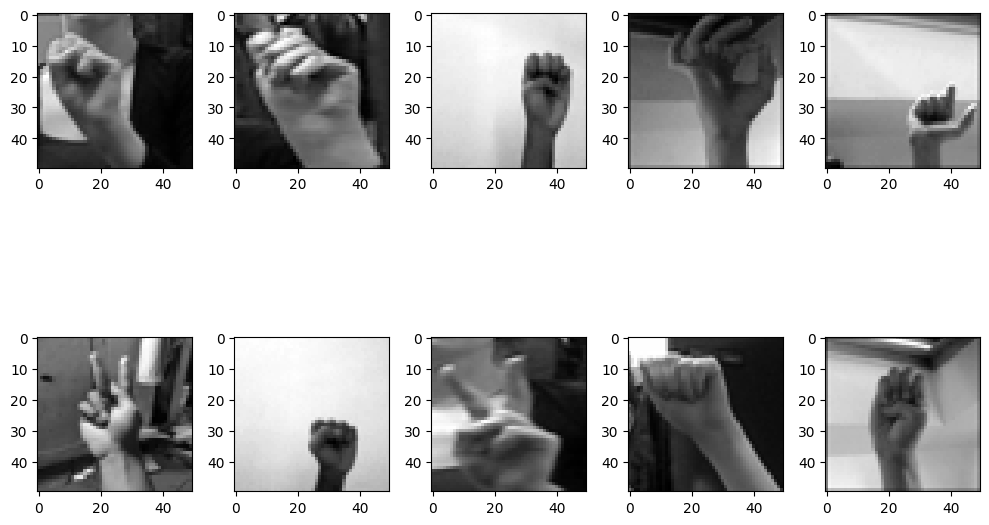

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(train_data[k].reshape(50, 50) , cmap = "gray")
        k += 1
    plt.tight_layout()    

In [ ]:
# With data augmentation to prevent overfitting

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_data)

In [ ]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(AccuracyCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= self.target_accuracy:
            print(f"\nReached target accuracy of {self.target_accuracy*100}%")
            self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (50,50,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units = 512 , activation = 'relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units = 26 , activation = 'softmax')
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 25, 25, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 50)       2

In [ ]:
# Define your callback
target_accuracy = 0.99
accuracy_callback = AccuracyCallback(target_accuracy)

# Train the model with the callback
history = model.fit(datagen.flow(train_data, train_label, batch_size = 128),
                    epochs = 20, 
                    validation_data = (val_data, val_label),
                    callbacks = [accuracy_callback])

Epoch 1/20
204/204 [==============================] - 28s 73ms/step - loss: 2.4191 - accuracy: 0.3075 - val_loss: 4.3717 - val_accuracy: 0.0711
Epoch 2/20
204/204 [==============================] - 14s 69ms/step - loss: 1.3576 - accuracy: 0.5822 - val_loss: 3.7835 - val_accuracy: 0.1237
Epoch 3/20
204/204 [==============================] - 14s 70ms/step - loss: 0.9707 - accuracy: 0.6936 - val_loss: 1.0626 - val_accuracy: 0.6685
Epoch 4/20
204/204 [==============================] - 16s 78ms/step - loss: 0.7546 - accuracy: 0.7625 - val_loss: 0.6075 - val_accuracy: 0.8150
Epoch 5/20
204/204 [==============================] - 14s 69ms/step - loss: 0.6212 - accuracy: 0.8026 - val_loss: 0.6648 - val_accuracy: 0.7987
Epoch 6/20
204/204 [==============================] - 14s 71ms/step - loss: 0.5360 - accuracy: 0.8264 - val_loss: 0.5617 - val_accuracy: 0.8418
Epoch 7/20
204/204 [==============================] - 14s 69ms/step - loss: 0.4804 - accuracy: 0.8486 - val_loss: 0.5339 - val_accuracy:

In [ ]:
print("Accuracy of the model is - " , model.evaluate(val_data,val_label)[1]*100 , "%")

102/102 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.9107
Accuracy of the model is -  91.07417464256287 %


In [ ]:
predictions = model.predict(val_data)
import numpy as np
print(np.argmax(val_label[:20], axis=1))
print(np.argmax(predictions[:20], axis=1))

102/102 [==============================] - 0s 3ms/step
[14 10  5 25 23  4  4 25 17 14 11  1 13  2 23  4 20 21  4 25]
[14 17  5 25 23  4  4 25 17  4 11  1 13  2 23  4  8 21  4 25]
